In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 한 실행칸에 프린트 여러개 해도 다 출력시키도록 하는 코드.
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
pd.set_option('display.max_rows', 500)
from datetime import datetime
from itertools import permutations

# 1번

In [2]:
def pure_length_of_string(s):
    cnt = 0
    for i in range(len(s)):
        if(s[i].isalpha()):
            cnt = cnt + 1
    return cnt

In [3]:
f1 = open("./I_have_a_dream.txt", 'r')
arr = []
while True:
    line = f1.readline()
    if not line: 
        break
    else:
        arr2 = line.split(' ')
        for j in range(len(arr2)):
            arr.append(arr2[j])
f1.close()
longest_words = []
longest_size = 0
for i in range(len(arr)):
    word = arr[i].replace('.','')
    leng = pure_length_of_string(word)
    if(longest_size < leng):
        longest_words = []
        longest_words.append(word)
        longest_size = leng
    elif(longest_size == leng):
        longest_words.append(word)
    else:
        continue
for i in range(len(longest_words)):
    print(longest_words[i])

discrimination


# 2번

In [4]:
arr2 = np.random.standard_normal(500)
arr2.sort()
bins = 10
for i in range(0, len(arr2), len(arr2)//bins):
    tmp = arr2[i : i + len(arr2)//bins]
    print('%dth ~ %dth -> mean : %.5f   std: %.5f' %(i+1, i + len(arr2)//bins, tmp.mean(), tmp.std()))

1th ~ 50th -> mean : -1.67190   std: 0.43484
51th ~ 100th -> mean : -1.01107   std: 0.10206
101th ~ 150th -> mean : -0.69657   std: 0.07881
151th ~ 200th -> mean : -0.42123   std: 0.06903
201th ~ 250th -> mean : -0.20380   std: 0.06347
251th ~ 300th -> mean : 0.04678   std: 0.08808
301th ~ 350th -> mean : 0.31119   std: 0.06824
351th ~ 400th -> mean : 0.60118   std: 0.07641
401th ~ 450th -> mean : 1.01280   std: 0.15212
451th ~ 500th -> mean : 1.84456   std: 0.48257


# 3번
데이터 없음.

# 4번

A번

In [5]:
sample1 = [(1, 2), (4, 3), (4, 5), (5, 3)]
sample2 = [(1, 2), (3, 2), (2, 4), (2, 5), (2, 5)]

In [6]:
def sort_tuple(_tuple):
    if (_tuple[0] > _tuple[1]):
        res = (_tuple[1], _tuple[0])
    return res

In [7]:
def preprocessing(_list):
    # 순서가 반대인 경우, sorting 해주기
    for i in range(len(_list)):
        if(_list[i][0] > _list[i][1]):
            _list[i] = sort_tuple(_list[i])
            
    # 중복제거
    _list = list(set(_list))
    
    return _list

In [8]:
def go(now, _list, visited):
    visited[now] = True
    if False not in visited[1:]:
        return True
    for i in range(len(_list[now])):
        next = _list[now][i]
        if(visited[next] == False):
            #print(next)
            if(go(next, _list, visited)):
                return True

In [11]:
def problemA(_list):
    visited = [False] * 6
    _list = preprocessing(_list)
    # 전체 샘플 만들기
    alist = [[], [], [], [], [], []]
    for i in range(len(_list)):
        dest1 = _list[i][0]
        dest2 = _list[i][1]
        alist[dest1].append(dest2)
        alist[dest2].append(dest1)
    #print(alist)
    # 연결여부 뽑아내기
    # root 가 1~5인 경우 모두 check할 필요 없이, 하나만 체크하면 된다. (연결되면 모두 간다.)
    result = go(1, alist, visited.copy())
    if(result != True):
        result = False
    return result

In [12]:
print(problemA(sample1))
print(problemA(sample2))

False
True


B번

In [13]:
items = [1, 2, 3, 4, 5]
_list = list(permutations(items, 5))
result = []
for i in range(len(_list)):
    now = list(_list[i])
    reverse = now.copy()
    reverse.reverse()
    if(now[0] < reverse[0]):
        tmp = []
        for j in range(len(now)-1):
            tmp.append((now[j], now[j + 1]))
        result.append(tmp)

for i in range(len(result)):
    for j in range(len(result[i])):
        print(result[i][j], end = ' ')
    print()
        

(1, 2) (2, 3) (3, 4) (4, 5) 
(1, 2) (2, 3) (3, 5) (5, 4) 
(1, 2) (2, 4) (4, 3) (3, 5) 
(1, 2) (2, 4) (4, 5) (5, 3) 
(1, 2) (2, 5) (5, 3) (3, 4) 
(1, 2) (2, 5) (5, 4) (4, 3) 
(1, 3) (3, 2) (2, 4) (4, 5) 
(1, 3) (3, 2) (2, 5) (5, 4) 
(1, 3) (3, 4) (4, 2) (2, 5) 
(1, 3) (3, 4) (4, 5) (5, 2) 
(1, 3) (3, 5) (5, 2) (2, 4) 
(1, 3) (3, 5) (5, 4) (4, 2) 
(1, 4) (4, 2) (2, 3) (3, 5) 
(1, 4) (4, 2) (2, 5) (5, 3) 
(1, 4) (4, 3) (3, 2) (2, 5) 
(1, 4) (4, 3) (3, 5) (5, 2) 
(1, 4) (4, 5) (5, 2) (2, 3) 
(1, 4) (4, 5) (5, 3) (3, 2) 
(1, 5) (5, 2) (2, 3) (3, 4) 
(1, 5) (5, 2) (2, 4) (4, 3) 
(1, 5) (5, 3) (3, 2) (2, 4) 
(1, 5) (5, 3) (3, 4) (4, 2) 
(1, 5) (5, 4) (4, 2) (2, 3) 
(1, 5) (5, 4) (4, 3) (3, 2) 
(2, 1) (1, 3) (3, 4) (4, 5) 
(2, 1) (1, 3) (3, 5) (5, 4) 
(2, 1) (1, 4) (4, 3) (3, 5) 
(2, 1) (1, 4) (4, 5) (5, 3) 
(2, 1) (1, 5) (5, 3) (3, 4) 
(2, 1) (1, 5) (5, 4) (4, 3) 
(2, 3) (3, 1) (1, 4) (4, 5) 
(2, 3) (3, 1) (1, 5) (5, 4) 
(2, 3) (3, 4) (4, 1) (1, 5) 
(2, 3) (3, 5) (5, 1) (1, 4) 
(2, 4) (4, 1) 

# 5번

## A

In [14]:
spx = pd.read_csv('./SPX.csv')
nky = pd.read_csv('./NKY.csv')

concat, merge, join

In [15]:
# all = pd.merge(spx, nky, left_on='Date', right_on='Date', how='outer')
all = pd.merge(spx, nky, on = 'Date', how='outer')
all['Date'] = pd.to_datetime(all['Date'])
print('# of NA in spx : ')
spx.isnull().count()
print('# of NA in nky : ')
nky.isnull().count()

# of NA in spx : 


Date         23098
Open         23098
High         23098
Low          23098
Close        23098
Adj Close    23098
Volume       23098
dtype: int64

# of NA in nky : 


Date         14145
Open         14145
High         14145
Low          14145
Close        14145
Adj Close    14145
Volume       14145
dtype: int64

## B

In [16]:
data_B = all[all['Date'] <= '2018-12-31']
data_B = data_B[data_B['Date'] >= '2016-01-01']
data_B

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
22103,2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4.304880e+09,18818.580078,18951.119141,18394.429688,18450.980469,18450.980469,140200.0
22104,2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3.706620e+09,18398.759766,18547.380859,18327.519531,18374.000000,18374.000000,132300.0
22105,2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4.336660e+09,18410.570313,18469.380859,18064.300781,18191.320313,18191.320313,142200.0
22106,2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5.076590e+09,18139.769531,18172.039063,17767.339844,17767.339844,17767.339844,168000.0
22107,2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4.664940e+09,17562.230469,17975.310547,17509.640625,17697.960938,17697.960938,184300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23576,2018-07-04,NaN,NaN,NaN,NaN,NaN,NaN,21679.000000,21784.000000,21604.179688,21717.039063,21717.039063,62200.0
23577,2018-09-03,NaN,NaN,NaN,NaN,NaN,NaN,22819.169922,22820.480469,22684.429688,22707.380859,22707.380859,49900.0
23578,2018-11-22,NaN,NaN,NaN,NaN,NaN,NaN,21582.470703,21684.640625,21484.980469,21646.550781,21646.550781,65900.0
23579,2018-12-05,NaN,NaN,NaN,NaN,NaN,NaN,21755.169922,21979.179688,21708.820313,21919.330078,21919.330078,83700.0


resample은 datetime이 index일 때 사용가능!

In [17]:
data_B.set_index('Date', inplace = True)
data_B

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
Date,,,,,,,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4.304880e+09,18818.580078,18951.119141,18394.429688,18450.980469,18450.980469,140200.0
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3.706620e+09,18398.759766,18547.380859,18327.519531,18374.000000,18374.000000,132300.0
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4.336660e+09,18410.570313,18469.380859,18064.300781,18191.320313,18191.320313,142200.0
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5.076590e+09,18139.769531,18172.039063,17767.339844,17767.339844,17767.339844,168000.0
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4.664940e+09,17562.230469,17975.310547,17509.640625,17697.960938,17697.960938,184300.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-04,NaN,NaN,NaN,NaN,NaN,NaN,21679.000000,21784.000000,21604.179688,21717.039063,21717.039063,62200.0
2018-09-03,NaN,NaN,NaN,NaN,NaN,NaN,22819.169922,22820.480469,22684.429688,22707.380859,22707.380859,49900.0
2018-11-22,NaN,NaN,NaN,NaN,NaN,NaN,21582.470703,21684.640625,21484.980469,21646.550781,21646.550781,65900.0


In [18]:
data_B.Close_x.resample('M').max()-data_B.Close_x.resample('M').min()

Date
2016-01-31    157.380005
2016-02-29    122.619995
2016-03-31     85.599975
2016-04-30     60.489868
2016-05-31     59.020020
2016-06-30    118.580078
2016-07-31     86.479980
2016-08-31     33.119873
2016-09-30     60.709960
2016-10-31     37.510010
2016-11-30    128.170166
2016-12-31     80.639893
2017-01-31     40.540039
2017-02-28     90.199951
2017-03-31     54.369873
2017-04-30     59.820069
2017-05-31     58.790039
2017-06-30     34.080078
2017-07-31     68.080078
2017-08-31     55.359863
2017-09-30     61.510009
2017-10-31     51.949951
2017-11-30     82.959961
2017-12-31     60.889892
2018-01-31    177.060058
2018-02-28    240.979980
2018-03-31    198.310058
2018-04-30    126.760010
2018-05-31    103.560059
2018-06-30     87.220215
2018-07-31    132.850097
2018-08-31    100.679932
2018-09-30     59.070068
2018-10-31    284.260010
2018-11-30    181.329834
2018-12-31    439.270019
Freq: M, Name: Close_x, dtype: float64

## C

In [21]:
data_c = all.copy()

In [22]:
data_c.fillna(method = 'ffill', inplace = True)
data_c = data_c[data_c['Date'] >= '2000-01-01']

In [23]:
data_c['num_month_week'] = data_c['Date'].apply(lambda x: x.isocalendar())
data_c['month'] = data_c['Date'].apply(lambda x: x.month)

In [24]:
data_c2 = all[['Date', 'Close_x', 'Close_y']].set_index('Date')
data_c2 = data_c2[data_c2.index >= '2000-01-01']

In [25]:
data_c2 = data_c2.resample('W-THU').ffill()
data_c2.columns = ['close_spx', 'close_nky']
data_c2.fillna(inplace = True, method = 'ffill')
answer = data_c2.resample('m').apply(lambda x: x[1])

상관계수 출력

In [26]:
answer['close_spx'].corr(answer['close_nky'])

0.8772760700412231

## D

In [27]:
data_D = all.copy()
data_D = data_D[data_D['Date'] >= '2000-01-01']
data_D = data_D.set_index('Date')
# 결측치 제거
data_D.dropna(inplace = True)

In [28]:
data_D2 = data_D[['Close_x', 'Close_y']]
data_D2.columns = ['close_spx', 'close_nky']

In [29]:
data_D3 = pd.DataFrame()
data_D3['dspx'] = data_D2['close_spx'].pct_change()
data_D3['dnky'] = data_D2['close_nky'].pct_change()
data_D3.dropna(inplace = True)

In [30]:
result1 = data_D3['dspx'].rolling(window = 250).std()
result2 = data_D3['dnky'].rolling(window = 250).std()

Text(0.5, 1.0, 'std of Return')

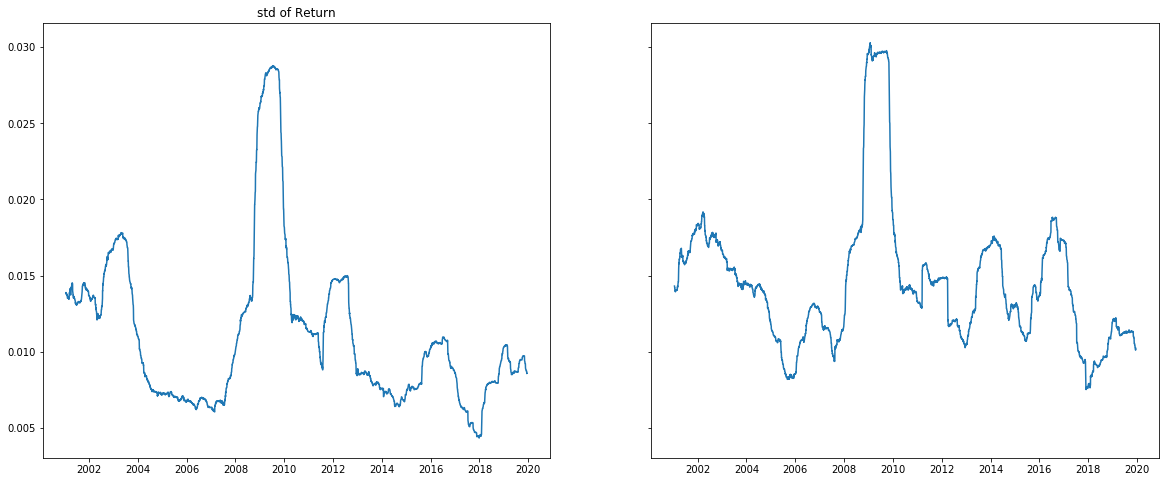

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (20, 8))
ax1.plot(result1.index, result1.values)
ax1.set_title('std of Return')
ax2.plot(result2.index, result2.values)
plt.show()

[]

Text(0.5, 1, 'std of Return')

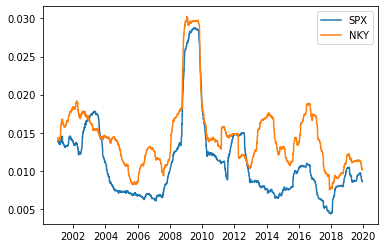

In [32]:
plt.plot(figsize = (20, 8))
plt.plot(result1.index, result1.values, label = 'SPX')
ax1.set_title('std of Return')
plt.plot(result2.index, result2.values, label = 'NKY')
plt.legend(loc='upper right')
plt.show()

# 6번

In [33]:
data6 = pd.read_csv('flight_data.csv')

In [34]:
data6['Fly Date'] = data6['Fly Date'].apply(lambda x: str(x))

In [35]:
data6['Fly Date'] = data6['Fly Date'].apply(lambda x: x[0:4] + '-' + x[4:6])
data6['Fly Date'] = data6['Fly Date'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m'))

## A

In [37]:
# 출발 공항과 도착 공항 별로 관측치의 갯수 
# 출발 공항
start = data6['Origin'].value_counts()
start
# 도착 공항
end = data6['Destination'].value_counts()
end

ORD    9139
ATL    8429
CLT    5989
MSP    5788
DTW    5604
       ... 
TIK       1
RCA       1
APC       1
NPA       1
HLG       1
Name: Origin, Length: 504, dtype: int64

ORD    9067
ATL    8559
CLT    5916
MSP    5843
DTW    5519
       ... 
FDY       1
DYS       1
RAC       1
LAL       1
HLG       1
Name: Destination, Length: 505, dtype: int64

In [38]:
# 출발은 있지만, 도착은 없는 공항
airports_start = data6['Origin'].unique() # 출발공항
airports_end = data6['Destination'].unique() # 도착공항

for i in range(len(airports_start)):
    now = airports_start[i]
    if now not in airports_end:
        print(now)

BYH
KDK
SKA
PSF
OSH
MMT
SBM
SHN
MGY
SSI
SRW
APC
DQU
PNE
AOH
GWO
PRB


In [39]:
# 도착은 있지만, 출발은 없는 공항
for i in range(len(airports_end)):
    now = airports_end[i]
    if now not in airports_start:
        print(now)

AUO
FFO
ESN
RAC
RSN
STE
II2
JXN
O85
SNS
MWC
CSV
LAM
MCC
DTN
STF
FCM
KY3


## B

In [40]:
data6_B = data6.copy()
data6_B = data6_B[data6_B['Fly Date'] >= '2009-01-01']
data6_B = data6_B[data6_B['Fly Date'] <= '2009-12-31']

In [41]:
data6_B.groupby(['Origin', 'Destination'])['Passengers'].sum()

Origin  Destination
1B1     BDL                1
ABE     ACT                0
        ATL            32976
        AVL               46
        AVP               73
                       ...  
YUM     HII                0
        IPL              531
        LAX            20307
        PHX            53514
        TUS               45
Name: Passengers, Length: 13955, dtype: int64

In [42]:
answer_B = data6_B.groupby(['Origin', 'Destination'])['Passengers'].sum().sort_values(ascending = False).iloc[0:5]

In [43]:
answer_B

Origin  Destination
LAX     SFO            1494141
SFO     LAX            1484766
LAX     JFK            1399495
JFK     LAX            1394359
MCO     ATL            1330836
Name: Passengers, dtype: int64

## C

In [45]:
data6_C = data6.copy()
data6_C.set_index('Fly Date', inplace = True)

In [46]:
data6_C2 = data6_C.resample('M').sum()
data6_C2['seatingRate'] = data6_C2['Passengers']/data6_C2['Seats']
#data6_C2
data6_C2 = data6_C2.sort_values('seatingRate', ascending = False)
data6_C2.index[0]
data6_C2.index[-1]

Timestamp('2009-07-31 00:00:00')

Timestamp('2009-01-31 00:00:00')

따라서 탑승률이 가장 높은 월은 2009년 7월이고,
가장 낮은 월은 2009년 1월이다.

## D

In [47]:
data6_D = data6.copy()
a = data6_D.groupby('Origin')['Flights'].sum()
b = data6_D.groupby('Origin')['Org Pop'].sum()
a.corr(b)

0.7501477928487864

## E

In [48]:
data6_E = data6.copy()

In [49]:
data6_E['Org City'] = data6_E['Org City'].apply(lambda x: x.split(', ')[-1])
data6_E['Dest City'] = data6_E['Dest City'].apply(lambda x: x.split(', ')[-1])

In [64]:
answer6_E = pd.pivot_table(data6_E, index='Org City', columns='Dest City',
               values='Passengers', aggfunc = np.sum, fill_value = 0)
answer6_E

Dest City,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Org City,,,,,,,,,,,,,,,,,,,,,
AK,840495,0,0,41168,28954,0,0,228,0,0,...,0,0,40616,74959,0,0,1046192,0,0,0
AL,0,2387,495,31826,0,320,24,86957,0,171538,...,0,211143,590000,178,211,0,52,36,0,59
AR,0,695,815,11664,12540,366,0,370,0,2479,...,0,147702,741876,0,37,0,0,0,0,0
AZ,37345,36077,14169,662526,4106505,108790,522,209002,0,414692,...,39289,192424,2317560,630048,0,0,712974,170490,0,253
CA,32680,2854,11709,4075768,13954969,63913,277,1563038,0,1048359,...,8235,383493,5552908,1635899,1371,0,3312948,141367,0,1479
CO,0,155,0,107827,60411,497,0,0,0,0,...,0,129,335092,81061,0,0,138,66,0,0
CT,0,301,0,0,0,0,12,216277,0,384366,...,21,34508,129883,0,97,12,0,156,148,0
DC,285,86965,476,202826,1573876,625,204091,3704,0,2118221,...,718,283158,1177661,106934,118712,96887,237413,150873,60842,592
DE,0,0,0,0,0,0,0,0,0,119,...,0,0,0,0,0,0,0,0,0,0


In [65]:
answer6_E.to_csv('./result.csv')